In [1]:
import numpy as np

#加载数据
data = np.loadtxt(fname='./线性数据.csv', delimiter='\t')

#标准化
data -= data.mean(axis=0)
data /= data.std(axis=0)

x = data[:, :-1]
y = data[:, -1]

x.shape, y.shape

((1503, 5), (1503,))

In [2]:
#常量
N, M = x.shape

#变量
w = np.ones(M)
b = 0

#初始化S为全0
S_w = np.zeros(M)
S_b = 0

v_w = np.zeros(M)
v_b = 0

In [3]:
#预测函数
def predict(x):
    return w.dot(x) + b


predict(x[0])

0.6590042695516539

In [4]:
#求loss,MSELoss
def get_loss(x, y):
    pred = predict(x)
    loss = (pred - y)**2
    return loss


get_loss(x[0], y[0])

0.21258140154187247

In [5]:
def get_gradient(x, y):
    global w
    global b

    eps = 1e-3

    loss_before = get_loss(x, y)

    gradient_w = np.empty(M)
    for i in range(M):
        w[i] += eps
        loss_after = get_loss(x, y)
        w[i] -= eps
        gradient_w[i] = (loss_after - loss_before) / eps

    b += eps
    loss_after = get_loss(x, y)
    b -= eps
    gradient_b = (loss_after - loss_before) / eps

    return gradient_w, gradient_b


get_gradient(x[0], y[0])

(array([-0.61003339, -1.05581946,  1.66242713,  1.21242212, -0.59417855]),
 0.923131013558981)

In [6]:
def total_loss():
    loss = 0
    for i in range(N):
        loss += get_loss(x[i], y[i])
    return loss


total_loss()

11073.905141728206

In [7]:
plt_x = []
plt_y = []

for t in range(1, 5500):
    i = np.random.randint(N)
    gradient_w, gradient_b = get_gradient(x[i], y[i])

    v_w = 0.9 * v_w + 0.1 * gradient_w
    v_b = 0.9 * v_b + 0.1 * gradient_b

    #S的计算和rmsprop完全一致
    S_w = 0.999 * S_w + 0.001 * gradient_w**2
    S_b = 0.999 * S_b + 0.001 * gradient_b**2

    #根据以上公式,在时刻0
    #v = [0.1 * gradient_0]

    #这可能太过于小,为了消除这个影响,需要做偏差修正,也就是除以系数
    #v = 0.1 * sigma[0.9**(t-i) * gradient_i]
    #S = 0.001 * sigma[0.999**(t-i) * gradient_i**2]
    
    #将梯度的系数部分整理得到
    #0.1 * sigma[0.9**(t-i)] = 1-0.9**t

    #偏差修正
    v_hat_w = v_w / (1 - 0.9**t)
    v_hat_b = v_b / (1 - 0.9**t)
    S_hat_w = S_w / (1 - 0.999**t)
    S_hat_b = S_b / (1 - 0.999**t)

    #下面是adam参数更新的公式
    #这里的1e-2是超参数lr
    gradient_w = (1e-2 * v_hat_w) / (S_hat_w**0.5 + 1e-6)
    gradient_b = (1e-2 * v_hat_b) / (S_hat_b**0.5 + 1e-6)

    #更新参数
    w -= gradient_w
    b -= gradient_b

    plt_x.append(t)
    plt_y.append(total_loss())

    if t % 500 == 0:
        print(t, v_hat_w[:2], S_hat_w[:2], total_loss())

500 [0.08904127 0.71062389] [16.68083241  9.3870837 ] 1261.5118603011992
1000 [-0.90368761  0.83072632] [8.3751223  4.76494681] 749.9516889645644
1500 [-0.30210063  0.02406904] [5.98086602 3.792364  ] 745.5930763832396
2000 [ 0.05851974 -0.52552324] [5.03242601 3.45097686] 734.1425192541457
2500 [ 0.19785822 -0.16807166] [4.55122551 2.92449296] 763.0359728232618
3000 [ 0.11518987 -0.08617003] [4.08077263 2.93377002] 746.4590779281906
3500 [ 0.14053857 -0.11983124] [3.52452827 2.59132747] 783.7272638890388
4000 [0.03610707 0.36194797] [3.26520532 2.42821712] 766.6407173851062
4500 [-0.24672945  0.18166294] [3.41205737 3.01430322] 791.864659000636
5000 [ 0.1558802  -0.19912752] [3.24213769 2.86521236] 788.53176983857


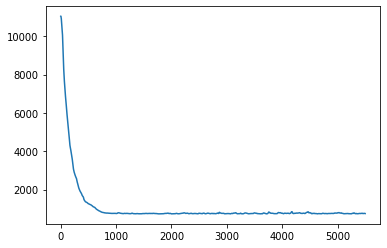

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(plt_x, plt_y)
plt.show()